# 2025-09-19 Projections, rotations, and reflections

* Orthogonality

* Projections

* Rotations

* Reflections

In [1]:
using LinearAlgebra
using Plots
using Polynomials
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

# Here's our Vandermonde matrix again
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

## Matrices as linear transformations

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.
The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.
The familiar definition,

$$ y_i = \sum_j A_{i, j} x_j $$

can also be viewed as

$$ y = \left[ A_{:, 1} \vert A_{:, 2} \vert \cdots \right] \begin{bmatrix} x_1\\ x_2\\ \vdots\\ \end{bmatrix} = \left[ A_{:, 1} \right] x_1 + \left[ A_{:, 2} \right] x_2 + \cdots $$

## Inner products and orthogonality

The **inner product**

$$ x^T y = \sum_i x_i y_y $$

of vectors (or columns of a matrix) tells us about their magnitude and about the angle.
The **norm** is induced by the inner product,

$$ \left\lvert \left\lvert x \right\rvert \right\rvert = \sqrt{x^T x} $$

and the angle $\theta$ is defined by

$$ cos \left( \theta \right) = \frac{x^T y}{\left\lvert \left\lvert x \right\rvert \right\rvert \left\lvert \left\lvert y \right\rvert \right\rvert} $$

Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties

$$ \left( x + y \right)^T z = x^T z + y^T z $$
$$ x^T \left( y + z \right) = x^T y + x^T z $$
$$ \left( \alpha x \right)^T \left( \beta y \right) = \alpha \beta x^T y $$

## Examples with inner products

In [2]:
x = [0, 1]
y = [1, 1]

# Let's take some inner products
@show x' * y
@show y' * x;

x' * y = 1
y' * x = 1


In [3]:
# Let's define a vector from an angle
@show ϕ = π/6
@show y = [cos(ϕ), sin(ϕ)]

# Let's compute and use the angle between x and y
println()
@show cos_θ = x' * y / (norm(x) * norm(y))
@show θ = acos(cos_θ)
@show rad2deg(θ)

# And compare to our original angle
println()
@show cos(ϕ - π/2);

ϕ = π / 6 = 0.5235987755982988
y = [cos(ϕ), sin(ϕ)] = [0.8660254037844387, 0.49999999999999994]

cos_θ = (x' * y) / (norm(x) * norm(y)) = 0.49999999999999994
θ = acos(cos_θ) = 1.0471975511965979
rad2deg(θ) = 60.00000000000001

cos(ϕ - π / 2) = 0.4999999999999999


## Polynomials can be orthogonal too

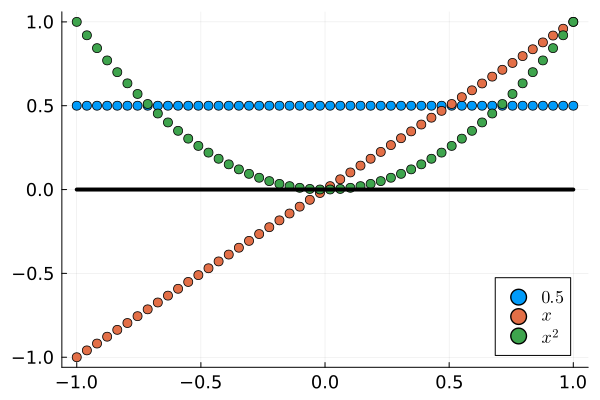

In [4]:
x = LinRange(-1, 1, 50)
A = vander(x, 4)
M = A * [.5 0 0 0; # 0.5
         0  1 0 0;  # x
         0  0 1 0]' # x^2

scatter(x, M, label=["\$0.5\$" "\$x\$" "\$x^2\$"])
plot!(x, 0*x, label=:none, color=:black)

Which inner products will be zero?

Which functions are even and odd?

In [5]:
# < 0.5, x >
@show M[:,1]' * M[:,2]

# < 0.5, x^2 >
@show M[:,1]' * M[:,3]

# <x, x^2 >
@show M[:,2]' * M[:,3];

(M[:, 1])' * M[:, 2] = -2.220446049250313e-16
(M[:, 1])' * M[:, 3] = 8.673469387755103
(M[:, 2])' * M[:, 3] = -4.440892098500626e-16


## Geometry of Linear Algebra

We'd like to develop intuition about transformations on vectors.
We'll start with a peanut shaped cluster of points and see how they transform.

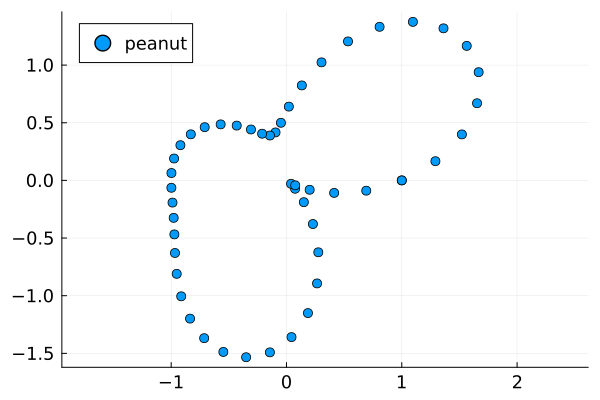

In [6]:
default(aspect_ratio=:equal)

# Here's the 'peanut'
function peanut()
    θ = LinRange(0, 2*π, 50)
    r = 1 .+ .4*sin.(3*θ) + .6*sin.(2*θ)
    x = r .* cos.(θ)
    y = r .* sin.(θ)
    x, y
end

x, y = peanut()
scatter(x, y, label="peanut")

We'll group all these points into a $2 \times n$ matrix $X$.
Note that multiplication by any matrix $A$ is applied to each column separately,

$$ A \underbrace{\Bigg[ \mathbf x_1 \Bigg| \mathbf x_2 \Bigg| \dotsb \Bigg]}_X = \underbrace{\Bigg[ A \mathbf x_1 \Bigg| A \mathbf x_2 \Bigg| \dotsb \Bigg]}_{AX} $$

In [7]:
# Here is our matrix X
X = [x y]'
@show size(X);

size(X) = (2, 50)


## Inner products and projections

Consider the operation $f \left( x \right) = v \left( v^T x \right)$ for some vector $v$.
We'll apply this same operation to every point in the original peanut $X$.

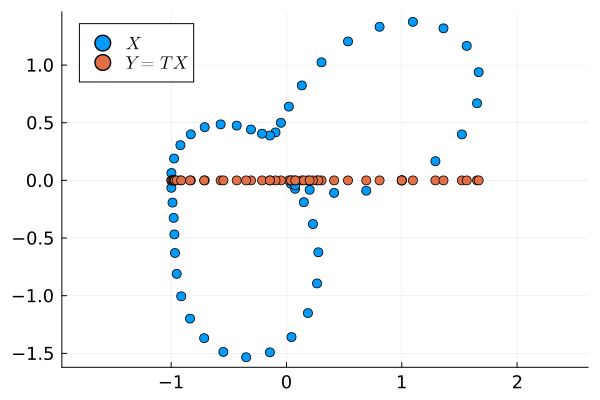

In [8]:
# Plot a transformation
function tplot(X, Y)
    "Plot a transformation from X to Y"
    scatter(X[1,:], X[2,:], label="\$X\$")
    scatter!(Y[1,:], Y[2,:], label="\$Y = T X\$")
end

v = [1, 0]
tplot(X, v * (v' * X))

Question - Are the parenthesis important?
Why or why not?

$$ v \left( v^T X \right) \overset?= v v^T X $$

## Exploration

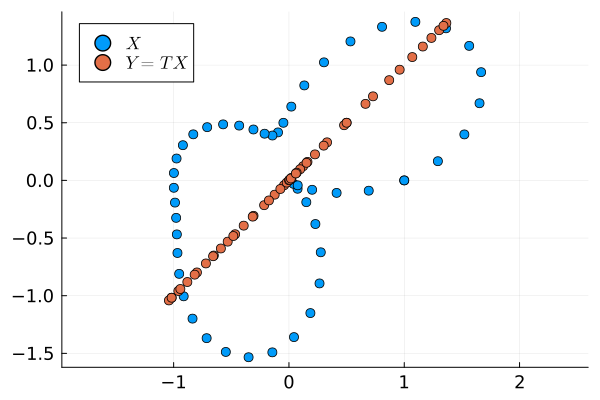

In [9]:
v = [1, 1] / sqrt(2)

# What happens if v is not normalized?
# Discuss with your group and make a prediction before removing the normalization and plotting
tplot(X,  v * v' * X)

norm(v) = 0.9999999999999999


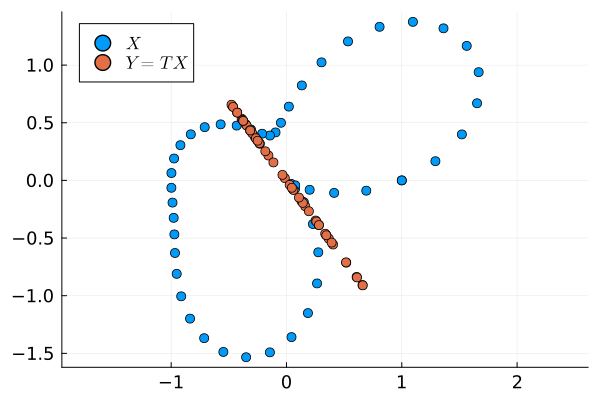

In [10]:
# Vector transformations are "nice" if norm(v) = 1
# Let's build a transformation from an angle
θ = π * .7
v = [cos(θ), sin(θ)]
@show norm(v)

tplot(X, v * v' * X)

## A related projector

Compare to the operation $I - v v^T$.
Note that $\left( I - v v^T \right) X = X - v v^T X$.

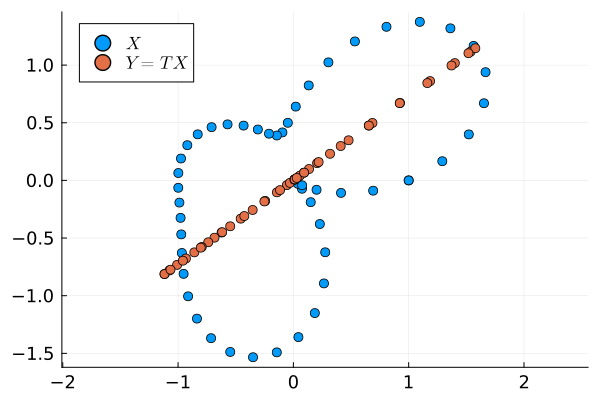

In [11]:
# Here's ther related projector
tplot(X, X - v * v' * X)
# This also works since I is the automatically-sized identity.
# tplot(X, (I - v * v') * X)

## Discussion

Discuss with your group what the vector $v$ looks like in these diagrams.

* What is the **nullspace** of each transformation?

* What is the **range** of each transformation?

* For each figure, what happens if you apply the transformation $v v^T$ to the red points?

* What about $I - v v^T$?

## Givens Rotation

We can rotate the input using a $2 \times 2$ matrix, parametrized by $\theta$.

In [12]:
# Create a Givens rotation matrix from θ
function our_givens(θ)
    s = sin(θ)
    c = cos(θ)
    A = [c -s;
         s  c]
end

@show our_givens(0)
@show our_givens(π);

our_givens(0) = [1.0 -0.0; 0.0 1.0]
our_givens(π) = [-1.0 -0.0; 0.0 -1.0]


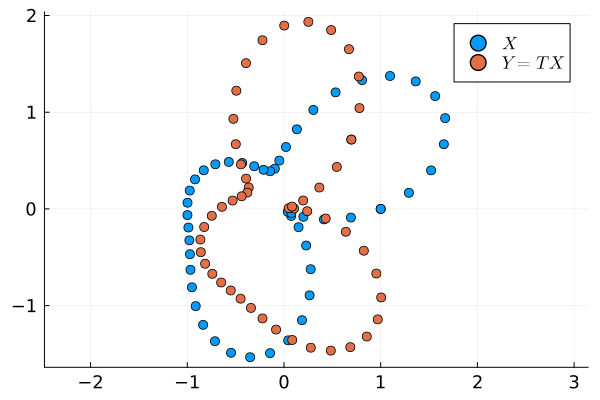

In [13]:
# Let's plot what happens when we apply our Givens matrix
tplot(X, our_givens(.8) * X)

* What is the **nullspace** and **range** of the Givens matrix?

* Is the Givens matrix **orthogonal**?
What does that mean?


(An [**orthogonal** matrix](https://en.wikipedia.org/wiki/Orthogonal_matrix) is square and has [**orthonormal**](https://en.wikipedia.org/wiki/Orthonormality) columns and rows.)

## Reflection

Using a construct of the form $I - \alpha v v^T$, create a reflection across the plane defined by the unit normal vector $v = \left[ \cos \left( \theta \right), \sin \left( \theta \right) \right]$.

Try different values of $\alpha$ and convince yourself of why it works or sketch a diagram for the projections $v v^T$ and $I - v v^T$ and decide how to modify it to make a reflection.

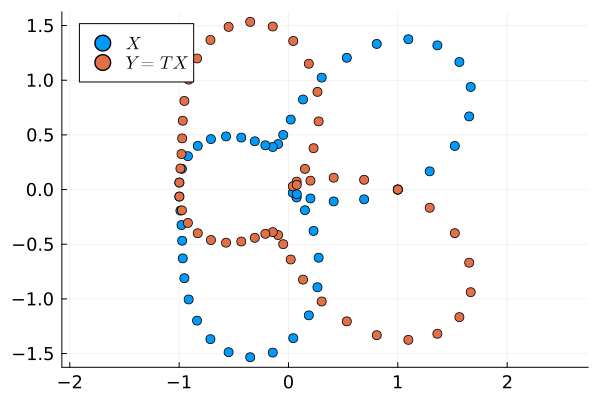

In [14]:
function reflect(θ)
    v = [cos(θ), sin(θ)]
    A = I - 0 * v * v' # Replace 0 with the correct constant
end

tplot(X, reflect(π / 2) * X)

In [15]:
using Test
@test mapslices(norm, X; dims=1) ≈ mapslices(norm, reflect(0.3) * X; dims=1)
@test X ≈ reflect(0.5) * reflect(0.5) * X

Test Passed

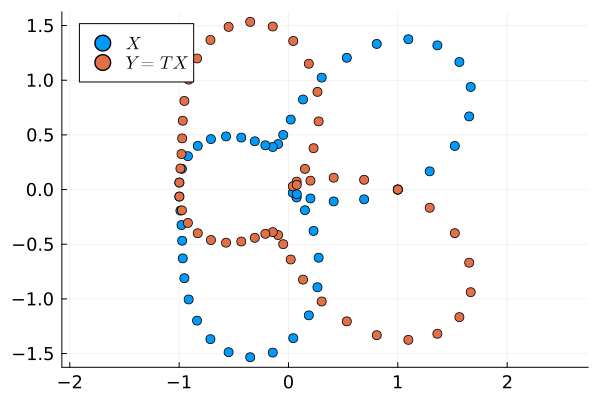

In [16]:
# It may help to think in terms of the projections
function reflect(θ)
    v = [cos(θ), sin(θ)]
    A = (I - v * v') + (v * v') # Multiply one 'direction' by -1 to flip
end

tplot(X, reflect(π / 2) * X)

* Where is the vector $v$ on the figure above?

* Does the reflection matrix change if you replace $v \left( \theta \right)$ with $v \left( \theta + \pi \right)$?
Why or why not?

* What happens if you reflect twice?

* What is the **nullspace** and **range** of the reflection matrix?

* Is the reflection matrix **orthogonal**?